In [1]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np

pd.set_option('display.max_columns', None)
df=pd.read_csv('RavdessAudioOnlyFeatures_NoZeroVar_TRAIN.csv')
df

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,sum,mean,std,min,max,q01,q05,q25,q50,q75,q95,q99,kur,skew,lag1_sum,lag1_mean,lag1_std,lag1_min,lag1_max,lag1_q01,lag1_q05,lag1_q25,lag1_q75,lag1_q95,lag1_q99,lag1_kur,lag1_skew,zc_sum,zc_mean,zc_std,zc_q95,zc_kur,zc_skew,mfcc_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,mfcc_q01,mfcc_q05,mfcc_q25,mfcc_q50,mfcc_q75,mfcc_q95,mfcc_q99,mfcc_kur,mfcc_skew,sc_sum,sc_mean,sc_std,sc_min,sc_max,sc_q01,sc_q05,sc_q25,sc_q50,sc_q75,sc_q95,sc_q99,sc_kur,sc_skew,stft_sum,stft_mean,stft_std,stft_min,stft_q01,stft_q05,stft_q25,stft_q50,stft_q75,stft_kur,stft_skew,length_w1,sum_w1,mean_w1,std_w1,min_w1,max_w1,q01_w1,q05_w1,q25_w1,q50_w1,q75_w1,q95_w1,q99_w1,kur_w1,skew_w1,lag1_sum_w1,lag1_mean_w1,lag1_std_w1,lag1_min_w1,lag1_max_w1,lag1_q01_w1,lag1_q05_w1,lag1_q25_w1,lag1_q75_w1,lag1_q95_w1,lag1_q99_w1,lag1_kur_w1,lag1_skew_w1,zc_sum_w1,zc_mean_w1,zc_std_w1,zc_q95_w1,zc_q99_w1,zc_kur_w1,zc_skew_w1,mfcc_sum_w1,mfcc_mean_w1,mfcc_std_w1,mfcc_min_w1,mfcc_max_w1,mfcc_q01_w1,mfcc_q05_w1,mfcc_q25_w1,mfcc_q50_w1,mfcc_q75_w1,mfcc_q95_w1,mfcc_q99_w1,mfcc_kur_w1,mfcc_skew_w1,sc_sum_w1,sc_mean_w1,sc_std_w1,sc_min_w1,sc_max_w1,sc_q01_w1,sc_q05_w1,sc_q25_w1,sc_q50_w1,sc_q75_w1,sc_q95_w1,sc_q99_w1,sc_kur_w1,sc_skew_w1,stft_sum_w1,stft_mean_w1,stft_std_w1,stft_min_w1,stft_max_w1,stft_q01_w1,stft_q05_w1,stft_q25_w1,stft_q50_w1,stft_q75_w1,stft_q95_w1,stft_q99_w1,stft_kur_w1,stft_skew_w1,length_w2,sum_w2,mean_w2,std_w2,min_w2,max_w2,q01_w2,q05_w2,q25_w2,q50_w2,q75_w2,q95_w2,q99_w2,kur_w2,skew_w2,lag1_sum_w2,lag1_mean_w2,lag1_std_w2,lag1_min_w2,lag1_max_w2,lag1_q01_w2,lag1_q05_w2,lag1_q25_w2,lag1_q50_w2,lag1_q75_w2,lag1_q95_w2,lag1_q99_w2,lag1_kur_w2,lag1_skew_w2,zc_sum_w2,zc_mean_w2,zc_std_w2,zc_q95_w2,zc_kur_w2,zc_skew_w2,mfcc_sum_w2,mfcc_mean_w2,mfcc_std_w2,mfcc_min_w2,mfcc_max_w2,mfcc_q01_w2,mfcc_q05_w2,mfcc_q25_w2,mfcc_q50_w2,mfcc_q75_w2,mfcc_q95_w2,mfcc_q99_w2,mfcc_kur_w2,mfcc_skew_w2,sc_sum_w2,sc_mean_w2,sc_std_w2,sc_min_w2,sc_max_w2,sc_q01_w2,sc_q05_w2,sc_q25_w2,sc_q50_w2,sc_q75_w2,sc_q95_w2,sc_q99_w2,sc_kur_w2,sc_skew_w2,stft_sum_w2,stft_mean_w2,stft_std_w2,stft_min_w2,stft_q01_w2,stft_q05_w2,stft_q25_w2,stft_q50_w2,stft_q75_w2,stft_kur_w2,stft_skew_w2,length_w3,sum_w3,mean_w3,std_w3,min_w3,max_w3,q01_w3,q05_w3,q25_w3,q50_w3,q75_w3,q95_w3,q99_w3,kur_w3,skew_w3,lag1_sum_w3,lag1_mean_w3,lag1_std_w3,lag1_min_w3,lag1_max_w3,lag1_q01_w3,lag1_q05_w3,lag1_q25_w3,lag1_q50_w3,lag1_q75_w3,lag1_q95_w3,lag1_q99_w3,lag1_kur_w3,lag1_skew_w3,zc_sum_w3,zc_mean_w3,zc_std_w3,zc_q95_w3,zc_kur_w3,zc_skew_w3,mfcc_sum_w3,mfcc_mean_w3,mfcc_std_w3,mfcc_min_w3,mfcc_max_w3,mfcc_q01_w3,mfcc_q05_w3,mfcc_q25_w3,mfcc_q50_w3,mfcc_q75_w3,mfcc_q95_w3,mfcc_q99_w3,mfcc_kur_w3,mfcc_skew_w3,sc_sum_w3,sc_mean_w3,sc_std_w3,sc_min_w3,sc_max_w3,sc_q01_w3,sc_q05_w3,sc_q25_w3,sc_q50_w3,sc_q75_w3,sc_q95_w3,sc_q99_w3,sc_kur_w3,sc_skew_w3,stft_sum_w3,stft_mean_w3,stft_std_w3,stft_min_w3,stft_q01_w3,stft_q05_w3,stft_q25_w3,stft_q50_w3,stft_q75_w3,stft_kur_w3,stft_skew_w3,length_w4,sum_w4,mean_w4,std_w4,min_w4,max_w4,q01_w4,q05_w4,q25_w4,q50_w4,q75_w4,q95_w4,q99_w4,kur_w4,skew_w4,lag1_sum_w4,lag1_mean_w4,lag1_std_w4,lag1_min_w4,lag1_max_w4,lag1_q01_w4,lag1_q05_w4,lag1_q25_w4,lag1_q75_w4,lag1_q95_w4,lag1_q99_w4,lag1_kur_w4,lag1_skew_w4,zc_sum_w4,zc_mean_w4,zc_std_w4,zc_q75_w4,zc_q95_w4,zc_q99_w4,zc_kur_w4,zc_skew_w4,mfcc_sum_w4,mfcc_mean_w4,mfcc_std_w4,mfcc_min_w4,mfcc_max_w4,mfcc_q01_w4,mfcc_q05_w4,mfcc_q25_w4,mfcc_q50_w4,mfcc_q75_w4,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,mfcc_skew_w4,sc_sum_w4,sc_mean_w4,sc_std_w4,sc_min_w4,sc_max_w4,sc_q01_w4,sc_q05_w4,sc_q25_w4,sc_q50_w4,sc_q75_w4,sc_q95_w4,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,0.145081,9.150000e-07,0.004001,-0.03

## Plot del convex hull usando due feature

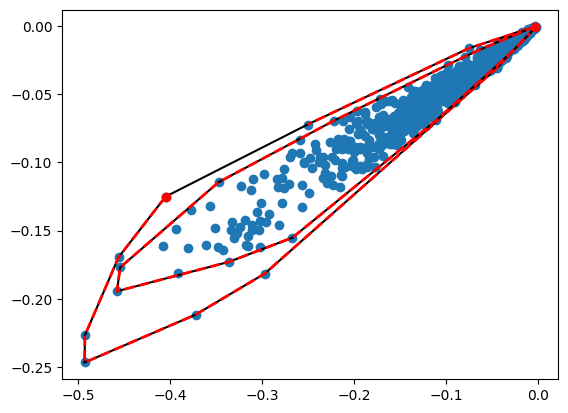

In [2]:
rng = np.random.default_rng(seed=10)
points = df[["q01","q05"]].to_numpy()#specificare qui le due feature sulle quali si vuole plottare

plt.plot(points[:,0], points[:,1], 'o')

for i in range(2):#cambiare il numero per cambiare la depth
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
    plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
    points=np.delete(points, hull.vertices,axis=0)
plt.show()

In [3]:
def db_convex_hull(k,df):
    #points=df.to_numpy()
    del_count=0
    for i in range(k):
        hull = ConvexHull(df)
        del_count+=len(hull.vertices)
        df.drop(df.index[hull.vertices],inplace=True)
        
    print("deleated "+str(del_count)+" points")
    return df

In [6]:
outlier_convex_dt=db_convex_hull(1,df.iloc[:,10:14])

deleated 37 points
